# Quantum Random Number Generator: Single-Qubit Serial Approach & Visualization

## Overview
This notebook provides a detailed, step-by-step breakdown of generating random numbers using Qiskit. It focuses on the **Serial Approach**, where a random number is constructed by running a single-qubit experiment multiple times. This notebook also includes visualization of the circuit and the probability distribution.

In [1]:
!pip install qiskit qiskit-aer[visualization]

## The Methodology

### 1. The Quantum Circuit
We utilize a simple circuit with **1 Qubit** and **1 Classical Bit**.
* **Hadamard Gate**: Applied to the qubit to create a superposition state.
    $$H|0\rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}}$$
* **Measurement**: The qubit is measured and stored in the classical bit.

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
#Initialise quantum circuit with one qubit and one bit
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)

In [3]:
#To create superposition apply Hadamard gate
qc.h(0)

In [4]:
#Measure the qubit at index 0 and store in the classical it at index 0
qc.measure(0,0)

### 2. Visualization
We use `matplotlib` to draw the circuit diagram and `plot_histogram` to verify that the randomness is uniform (roughly 50/50 distribution between 0 and 1 over many shots).

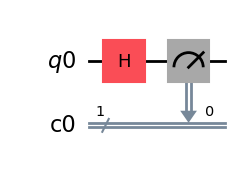

In [5]:
#Draw the circuit using matplotlib
qc.draw("mpl")

{'1': 503, '0': 521}


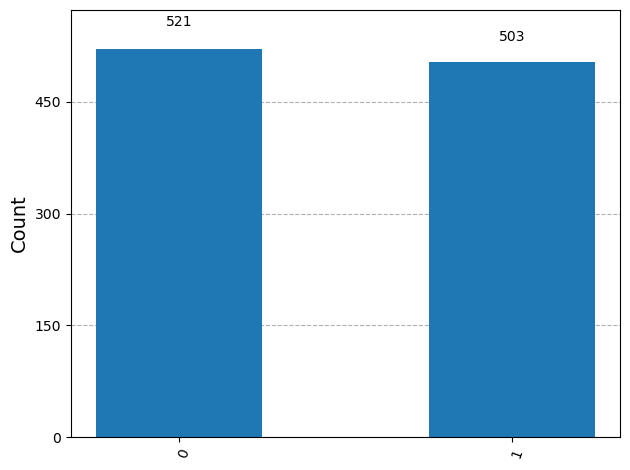

In [6]:
from qiskit import transpile
from qiskit_aer import Aer
from qiskit_aer import AerSimulator
backend= AerSimulator()
qc_compile=transpile(qc, backend)
job= backend.run(qc_compile, shots=1024)
result=job.result()
counts= result.get_counts()
print(counts)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

### 3. Generation Process (The Serial Method)
To generate a multi-bit random number (e.g., 64-bit), we do not add 64 qubits. Instead, we run the *same* single-qubit circuit 64 times (`shots=64`).
* **`memory=True`**: This parameter is crucial. It allows us to retrieve the specific outcome of each individual shot (e.g., `['1', '0', '1', '1'...]`) rather than just the aggregate counts.

In [7]:
# Run the simulator 64 times to generate 64-bit number
result= backend.run(qc, shots=64, memory=True).result()
#Meaning: Run the quantum circuit 64 times, store each measurement outcome separately, and return the full result.

In [8]:
# Extract the results from memory in a list and print them
bits = result.get_memory(qc)
print(bits)

['1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '1', '1', '0', '1', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '1', '1']


### 4. Post-Processing
* **Bit Stitching**: The individual measurement outcomes are joined to form a binary string.
* **Conversion**:
    * **Integer**: Converted using base-2.
    * **Hexadecimal**: Converted for compact representation (useful for cryptographic keys).
      
  ### Bit-to-Hex Reference
* 32 bits $\approx$ 8 hex chars
* 64 bits $\approx$ 16 hex chars
* 128 bits $\approx$ 32 hex chars

In [9]:
#Join the bits in the list
random_bits=''.join(bits)

In [10]:
#Convert the joined bits into a number and print 
random_number=int(random_bits,2)
print(random_number)

10808916027716656819


In [11]:
#Convert the joined bits into a hex and print 
random_number=hex(int(random_bits,2))[2:] #Cut "0x"
print(random_number)

9600fbdbef13deb3


## Advantages of This Approach

+ Demonstrates QRNG at the single-qubit level
+ Helps understand how randomness arises
+ Visual histogram shows 50-50 distribution
+ Produces binary, integer, and hexadecimal outputs